# Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

<Axes: ylabel='count'>

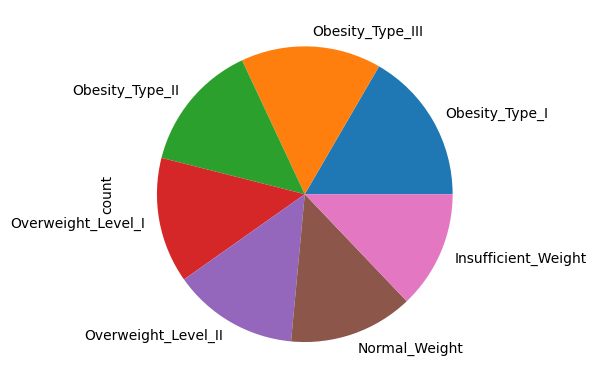

In [6]:
df['NObeyesdad'].value_counts().plot.pie()

In [7]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['NObeyesdad'] = enc.fit_transform(df['NObeyesdad'])

In [8]:
X = df.drop(['NObeyesdad'], axis='columns')
y = df['NObeyesdad']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=42)

In [14]:
cat_cols = ['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipeline=Pipeline(
    
    steps=[
        
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
     ]
)

cat_pipeline=Pipeline(
    
    steps=[
        
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder())
    ]


)

In [17]:
preprocessor=ColumnTransformer([
    
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
])

In [18]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [20]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [21]:
def evaluate_model(X_train,y_trian,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        print(model.score(X_train,y_train))
        #print("OOB score:", model.oob_score_)
        
        y_pred=model.predict(X_test)
        
        accuracy=round(accuracy_score(y_test,y_pred)*100,2)
        
        report[list(models.keys())[i]]=accuracy
    
    return report

In [22]:
evaluate_model(X_train, y_train, X_test, y_test, models)

1.0
0.9383886255924171
1.0
1.0


{'Random Forest': 88.36,
 'SVC': 83.49,
 'Decision Tree': 88.97,
 'Gradient Boosting': 91.47}